In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
bitcoin = pd.read_csv("Kraken_BTCUSD_d.csv", parse_dates=['Date'])
exchange = pd.read_csv("DEXUSEU.csv", parse_dates=['DATE'])
gold = pd.read_csv("GOLDAMGBD228NLBM.csv", parse_dates=['DATE'])
sp500 = pd.read_csv("SP500.csv", parse_dates=['DATE'])
bitcoin = bitcoin[["Date", "Open"]]
bitcoin.columns = ["DATE", "BITCOIN"]



In [3]:

print(bitcoin.columns, bitcoin.dtypes, 
exchange.columns, exchange.dtypes,
gold.columns, gold.dtypes,
sp500.columns, sp500.dtypes)

Index(['DATE', 'BITCOIN'], dtype='object') DATE       datetime64[ns]
BITCOIN           float64
dtype: object Index(['DATE', 'DEXUSEU'], dtype='object') DATE       datetime64[ns]
DEXUSEU            object
dtype: object Index(['DATE', 'GOLDAMGBD228NLBM'], dtype='object') DATE                datetime64[ns]
GOLDAMGBD228NLBM            object
dtype: object Index(['DATE', 'SP500'], dtype='object') DATE     datetime64[ns]
SP500            object
dtype: object


In [4]:
data = pd.merge(bitcoin, exchange, on="DATE", how="inner")
data = pd.merge(data, gold, on="DATE", how="inner")
data = pd.merge(data, sp500, on="DATE", how="inner")
data["DEXUSEU"] = pd.to_numeric(data["DEXUSEU"] , errors="coerce").fillna(method='ffill')
data["GOLDAMGBD228NLBM"] = pd.to_numeric(data["GOLDAMGBD228NLBM"], errors="coerce").fillna(method='ffill')
data["SP500"] = pd.to_numeric(data["SP500"], errors="coerce").fillna(method='ffill')

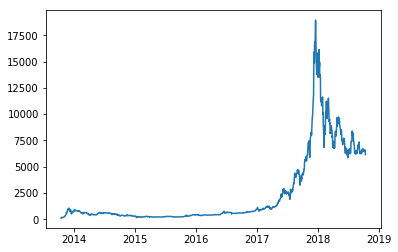

In [5]:
plt.figure()
plt.plot(data["DATE"], data["BITCOIN"])



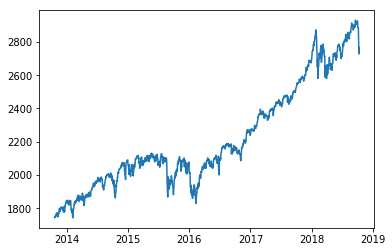

In [6]:
plt.figure()
plt.plot(data["DATE"], data["SP500"])


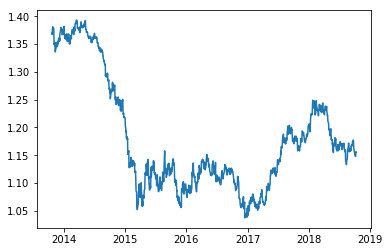

In [7]:
plt.figure()
plt.plot(data["DATE"], data["DEXUSEU"])

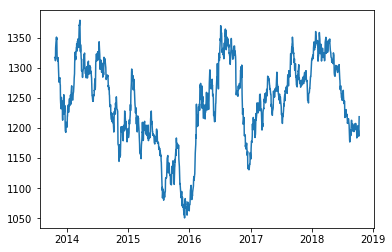

In [8]:
plt.figure()
plt.plot(data["DATE"], data["GOLDAMGBD228NLBM"])

In [9]:
model1 = smf.ols('BITCOIN~SP500+GOLDAMGBD228NLBM+DEXUSEU',data=data).fit()


model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                BITCOIN   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     1489.
Date:                Thu, 18 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:23:47   Log-Likelihood:                -11485.
No. Observations:                1301   AIC:                         2.298e+04
Df Residuals:                    1297   BIC:                         2.300e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3.341e+04    880.469    -37.943      0.000   -3.51e+04   -3.17e+04
SP500               10.2575      0.169     60.836      0.000       9.927      10.588
GOLDAMGBD228NLBM    -0.1156      0.810     -0.143      0.887      -1.706       1.474
DEXUSEU           1.116e+04    579.277     19.264      0.000       1e+04    1.23e+04
==============================================================================
Omnibus:                      834.775   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11064.393
Skew:                           2.802   Prob(JB):                         0.00
Kurtosis:                      16.142   Cond. No.                     5.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
from arch.unitroot import KPSS

kpss = KPSS(data["BITCOIN"].diff().dropna())
print(kpss.summary().as_text())

kpss = KPSS(data["SP500"].diff().dropna())
print(kpss.summary().as_text())

kpss = KPSS(data["GOLDAMGBD228NLBM"].diff().dropna())
print(kpss.summary().as_text())

kpss = KPSS(data["DEXUSEU"].diff().diff().dropna())
print(kpss.summary().as_text())

True
    KPSS Stationarity Test Results   
Test Statistic                  0.057
P-value                         0.836
Lags                               23
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
True
    KPSS Stationarity Test Results   
Test Statistic                  0.060
P-value                         0.817
Lags                               23
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
True
    KPSS Stationarity Test Results   
Test Statistic                  0.052
P-value                         0.862
Lags                               23
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (1